<a href="https://colab.research.google.com/github/seifahmed2004/ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df


#second way to download the dataset
# !kaggle datasets download -d gaurav2022/mobile-health
# !unzip mobile-health.zip
# df = pd.read_csv('mhealth_raw_data.csv')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject'])
df.drop(columns=['subject'], inplace=True)
sample_of_data = df.sample(n=10000, random_state=42)
X = sample_of_data.drop(columns=['Activity'])
y = sample_of_data['Activity']

In [4]:
df_subset = df.iloc[50000:50200]
df_subset

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject_encoded
50000,2.2716,-9.3919,0.41771,-0.34508,-0.78049,0.36149,-3.6387,-9.2130,1.6956,-0.86667,-0.63039,0.103450,0,0
50001,2.1813,-9.5103,0.45255,-0.34508,-0.78049,0.36149,-3.8422,-9.1820,1.8013,-0.85294,-0.64271,0.075431,0,0
50002,2.1922,-9.5296,0.50377,-0.34508,-0.78049,0.36149,-3.8927,-9.2516,1.8395,-0.85294,-0.64271,0.075431,0,0
50003,2.3170,-9.6572,0.61322,-0.34508,-0.78049,0.36149,-3.9181,-9.2432,1.6837,-0.85294,-0.64271,0.075431,0,0
50004,2.2754,-9.6680,0.52894,-0.34508,-0.78049,0.36149,-4.0132,-9.1817,1.8326,-0.85490,-0.67762,0.056034,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50195,2.1828,-9.6188,0.49922,-0.35436,-0.78987,0.36739,-3.3133,-9.1982,1.1755,-0.87843,-0.60575,0.120690,0,0
50196,2.2755,-9.4079,0.79194,-0.35436,-0.78987,0.36739,-3.1108,-9.0861,1.3894,-0.89020,-0.60575,0.120690,0,0
50197,2.3695,-9.9658,0.45249,-0.34879,-0.77861,0.37721,-3.1826,-9.1254,1.4604,-0.89020,-0.60575,0.120690,0,0
50198,2.0005,-9.6274,0.62197,-0.34879,-0.77861,0.37721,-3.1135,-8.9656,1.4371,-0.89020,-0.60575,0.120690,0,0


<Axes: >

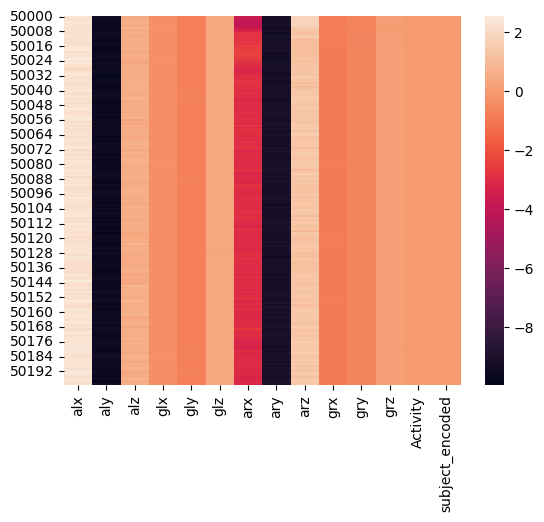

In [5]:
import seaborn as sns
sns.heatmap(df_subset)

Sample data points:
      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity  subject_encoded  
0  0.187760 -0.44902 -1.0103  0.034483         0                0  
1  0.023595 -0.44902 -1.0103  0.034483         0                0  
2  0.275720 -0.44902 -1.0103  0.034483         0                0  
3  0.367520 -0.45686 -1.0082  0.025862         0                0  
4  0.407290 -0.45686 -1.0082  0.025862         0                0  


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


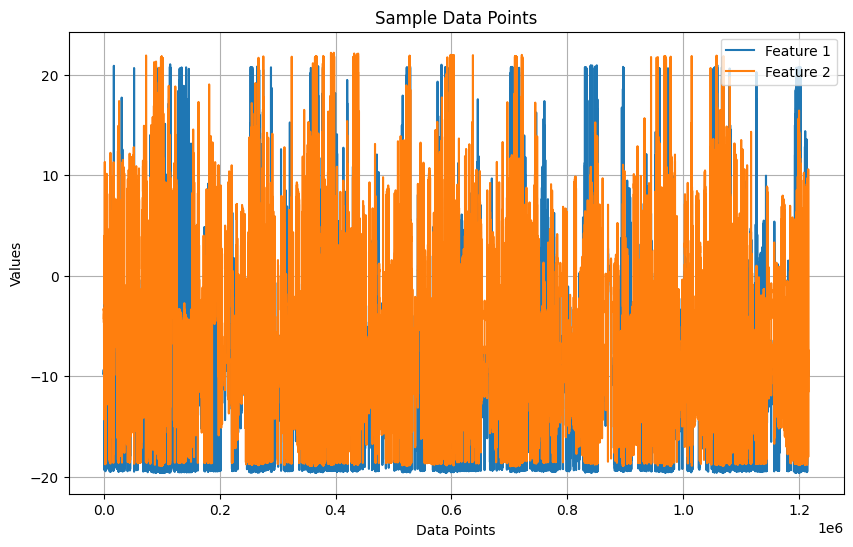

In [6]:
#Visualization of sample data points
print("Sample data points:")
print(df.head())
plt.figure(figsize=(10, 6))

plt.plot(df['aly'], label='Feature 1')
plt.plot(df['ary'], label='Feature 2')

plt.title('Sample Data Points')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [8]:
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = True, random_state=42)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [9]:
X_train = pd.DataFrame(X_train)
X_train = X_train.dropna()
y_train = pd.DataFrame(y_train)
y_train = y_train.dropna()

In [10]:
X.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: subject_encoded, dtype: int64

In [12]:
df_no_duplicates = df.drop_duplicates()
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

Original DataFrame shape: (1215745, 14)
DataFrame shape after removing duplicates: (1215745, 14)


In [13]:
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples ")

training set size: 972596 samples 
test set size: 243149 samples 


In [14]:
from collections import Counter
from sklearn.metrics import accuracy_score

In [15]:
#https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using your training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
knn

KNeighborsClassifier(n_neighbors=3)

In [17]:
accuracy = accuracy_score(y_test, predictions)

print("Knn accuracy: ", accuracy)

Knn accuracy:  0.7440951844342358


In [17]:
from sklearn.svm import SVC
y_train = y_train[:10000]
X_train = X_train[:10000]
c_values = [0.1 , 1 , 10]
gamma_values = [0.01 , 0.1 , 1]
for gamma in gamma_values:
  for c in c_values:
      svm = SVC(C=c, gamma=gamma)
      svm.fit(X_train, y_train)
      svm_pred = svm.predict(X_test)
      accuracy = accuracy_score(y_test,svm_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [18]:
print("SVM accuracy: ",accuracy)

0.4157738670527125

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(851021, 13) (182362, 13) (182362, 13) (851021,) (182362,) (182362,)


In [21]:
1022/32

31.9375

In [44]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

In [45]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)), #vector
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [46]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [48]:
from keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Fit model on training data")


Fit model on training data


In [49]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)


Epoch 1/10
782/782 [==============================] - 8s 8ms/step - loss: 0.3525 - accuracy: 0.8986 - val_loss: 0.1965 - val_accuracy: 0.9438
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1566 - accuracy: 0.9534 - val_loss: 0.1410 - val_accuracy: 0.9611
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1128 - accuracy: 0.9662 - val_loss: 0.1128 - val_accuracy: 0.9677
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0892 - accuracy: 0.9728 - val_loss: 0.1132 - val_accuracy: 0.9686
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.1010 - val_accuracy: 0.9708
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0611 - accuracy: 0.9807 - val_loss: 0.1067 - val_accuracy: 0.9714
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.1088 - val_accuracy: 0.9708
Epoch 

In [50]:
from sklearn.model_selection import train_test_split

# Assuming you have your input data X and target data y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))


Training set shapes - X_train: (972596, 13), y_train: (972596,)
Testing set shapes - X_test: (243149, 13), y_test: (243149,)


In [51]:
X_test_adj = X_test[:5000]
y_test_adj = y_test[:5000]

In [70]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))  # Adjust input shape to (13,)
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# evaluation
evaluation_results = model.evaluate(X_test_adj, y_test_adj)
evaluation_results

157/157 [==============================] - 1s 4ms/step - loss: -3.8247 - accuracy: 0.0800


[-3.8247156143188477, 0.07999999821186066]

In [71]:
accuracy = evaluation_results[1]

print("Accuracy:", accuracy)

Accuracy: 0.07999999821186066


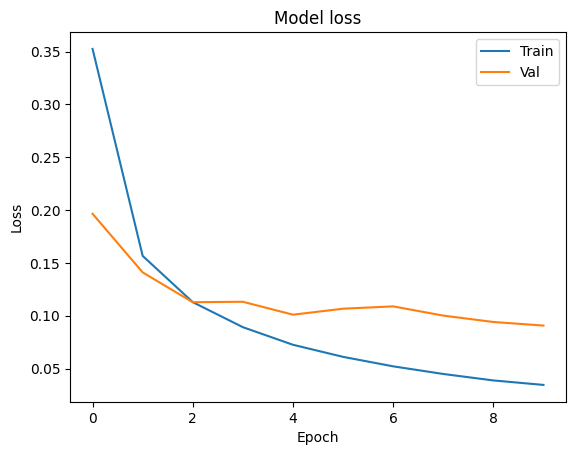

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

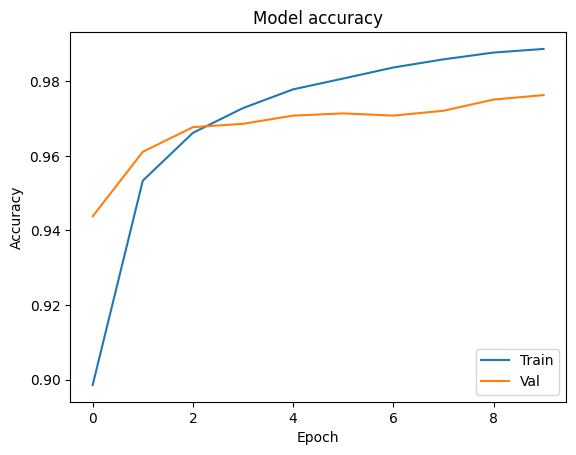

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [74]:
#Define sigmoid function
def sigmoid(z):
    #output > 0.5 when z is positive
    #output < 0.5 when z is negative
    return 1/(1+np.exp(-z)) # Output in range [0,1]

In [75]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

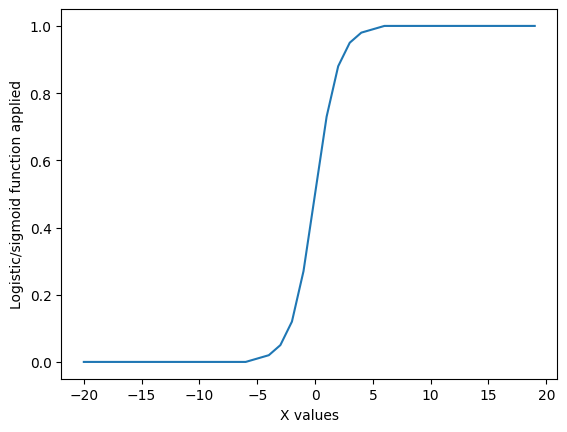

In [76]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

In [77]:
df.isna().sum()

alx                0
aly                0
alz                0
glx                0
gly                0
glz                0
arx                0
ary                0
arz                0
grx                0
gry                0
grz                0
Activity           0
subject_encoded    0
dtype: int64

In [78]:
df.duplicated().sum()

0

In [79]:
df['alx'].value_counts()

alx
 19.59600    324
 19.58600    287
 19.57500    209
 19.60600    182
 19.56500     82
            ... 
 7.36230       1
-2.93850       1
-9.24390       1
 0.74650       1
 0.99736       1
Name: count, Length: 320576, dtype: int64

In [83]:
X_train = np.random.rand(100, 13)
y_train = np.random.randint(0, 2, 100)
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred=clf.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 0, 0, 0])

In [85]:
y_test = np.random.randint(0, 2, 243149)
print(accuracy_score(y_test,y_pred))

0.5004750173761767


In [86]:
# Convert labels to the same type if necessary
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

# Now you can calculate the confusion matrix
confusion_matrix(y_test, y_pred)


array([[89601, 32001],
       [89458, 32089]])

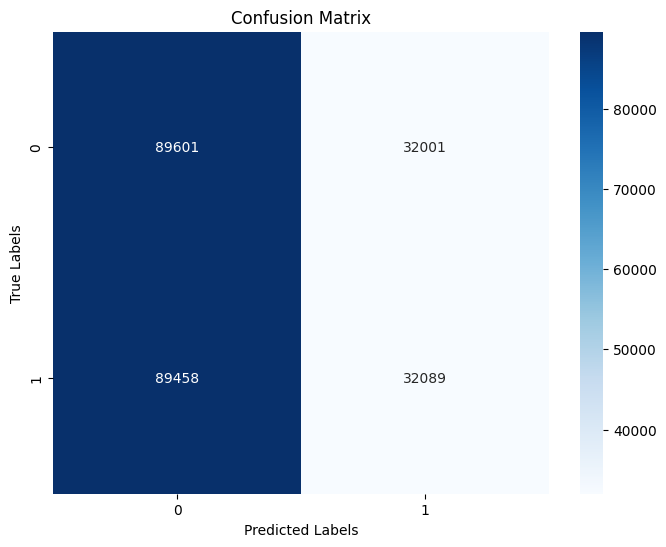

In [87]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


In [45]:
X = df[['aly', 'ary']].values
y = df['Activity'].values

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


In [ ]:
# from sklearn.svm import SVC
# my_svm = SVC(C=10, gamma=1)
# clf = my_svm
# scores = cross_val_score(clf, X[:1000], y[:1000], cv=5)
# scores

In [ ]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm


In [ ]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [ ]:
auto_data = pd.read_csv('/content/mhealth_raw_data.csv', na_values='?').dropna()
auto_data.info()

In [ ]:
auto_data.head()

In [ ]:
auto_data.describe()

In [ ]:
train_df = auto_data.sample(196, random_state = 1) # split the data into two halfs # random_state to get the same result every time
val_df = auto_data[~auto_data.isin(train_df)].dropna(how = 'all')

X_train = train_df['alx'].values.reshape(-1,1)
y_train = train_df['aly']
X_val = val_df['alz'].values.reshape(-1,1)
y_val = val_df['glx']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Linear
lm = skl_lm.LinearRegression()

model = lm.fit(X_train, y_train)
print(mean_squared_error(y_val, model.predict(X_val)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_val, model.predict(X_val2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_val, model.predict(X_val3)))

In [ ]:
train_df = auto_data.sample(196, random_state = 2) # split the data into two halfs # random_state to get the same result every time
val_df = auto_data[~auto_data.isin(train_df)].dropna(how = 'all')

X_train = train_df['alx'].values.reshape(-1,1)
y_train = train_df['aly']
X_val = val_df['alz'].values.reshape(-1,1)
y_val = val_df['glx']

model = lm.fit(X_train, y_train)
print(mean_squared_error(y_val, model.predict(X_val)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_val, model.predict(X_val2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_val, model.predict(X_val3)))

In [ ]:
#Leave-One-Out Cross-Validation (LOOCV)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = auto_data['alx'].values.reshape(-1,1)
y = auto_data['aly'].values.reshape(-1,1)

# making n_splits = # of entries make the cross_val_score use only one entry for testing and the rest for training (LOOCV)
crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

# cross validation scores : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
scores = cross_val_score(lm, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

#print(scores)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


In [ ]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(lm, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

In [ ]:
#k-Fold Cross-Validation
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(lm, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))